This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html

In [1]:
%matplotlib inline

In [2]:
import thinkplot
import thinkbayes2
from thinkbayes2 import Suite,Pmf

In [3]:
def Percentile(pmf, percentage):
    """Computes a percentile of a given Pmf.

    percentage: float 0-100
    """
    p = percentage / 100.0
    total = 0
    for val, prob in pmf.Items():
        total += prob
        if total >= p:
            return val

In [4]:
class Dice(Suite):
    """Represents hypotheses about which die was rolled."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer number of sides on the die
        data: integer die roll
        """
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

In [5]:
class Train(Dice):
    """Represents hypotheses about how many trains the company has."""

In [6]:
class Train2(Dice):
    """Represents hypotheses about how many trains the company has."""

    def __init__(self, hypos, alpha=1.0):
        """Initializes the hypotheses with a power law distribution.

        hypos: sequence of hypotheses
        alpha: parameter of the power law prior
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()

In [7]:
def MakePosterior(high, dataset, constructor):
    """Makes and updates a Suite.

    high: upper bound on the range of hypotheses
    dataset: observed data to use for the update
    constructor: function that makes a new suite

    Returns: posterior Suite
    """
    hypos = range(1, high+1)
    suite = constructor(hypos)
    suite.name = str(high)

    for data in dataset:
        suite.Update(data)

    return suite

In [8]:
def ComparePriors():
    """Runs the analysis with two different priors and compares them."""
    dataset = [60]
    high = 1000

    thinkplot.Clf()
    thinkplot.PrePlot(num=2)

    constructors = [Train, Train2]
    labels = ['uniform', 'power law']

    for constructor, label in zip(constructors, labels):
        suite = MakePosterior(high, dataset, constructor)
        suite.label = label
        thinkplot.Pmf(suite)

    thinkplot.Config(xlabel='Number of trains',
                     ylabel='Probability')

In [ ]:
def Mean(suite):
    total = 0
    for hypo, prob in suite.Items():
        total += hypo * prob
    return to

500 130.70846986256004
1000 133.2752313750312
2000 133.99746308073065
(91, 243)
(91, 243)


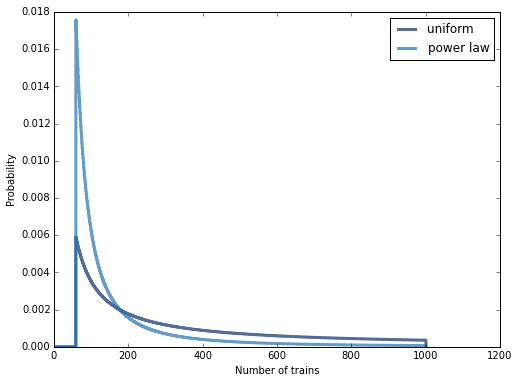

In [9]:
    ComparePriors()

    dataset = [30, 60, 90]

    thinkplot.PrePlot(num=3)

    for high in [500, 1000, 2000]:
        suite = MakePosterior(high, dataset, Train2)
        print(high, suite.Mean())

    thinkplot.Config(xlabel='Number of trains',
                   ylabel='Probability')

    interval = Percentile(suite, 5), Percentile(suite, 95)
    print(interval)

    cdf = thinkbayes2.MakeCdfFromPmf(suite)
    interval = cdf.Percentile(5), cdf.Percentile(95)
    print(interval)

